
## 결정트리
결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습함<br >

장점)전처리에 민감하지 않음 <br >


단점)데이터에 민감함(2의 N승으로 나눠지기에 어쩌다보면 데이터갯수보다 나누는 칸의 수가 많게 되면 데이터를 따라가기에 과대적합이 될 수 있다.)

In [83]:
#라이브러리 먼저 선언하고 preamble를 뒤에 써줘야 함
import pandas as pd
import mglearn 
import preamble

In [84]:
pd.__version__

'2.2.2'

In [85]:
#Graphviz 2.38 설치 후 "런타임 오류: Graphviz 실행 파일이 시스템 경로에 있는지 확인하세요
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

In [86]:
from preamble import *

한국어 출력(plt 설정->graphviz 한국어 처리->plt로 넘겨 받아 출력)
plt는 폰트 설정 필요
윈도우:맑은 고딕



Text(0.5, 1.0, '결정트리')

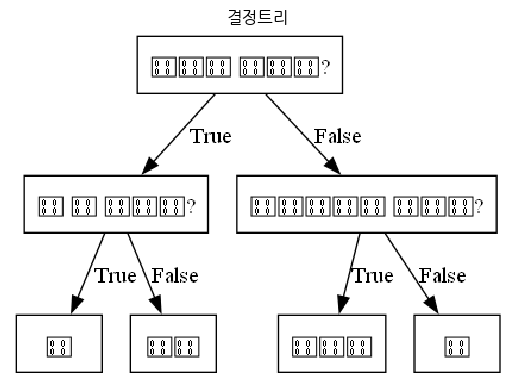

In [87]:
#트리가 안 보일 때 ModuleNotFoundError: No module named 'graphviz'
# https://graphviz.org/download/  graphviz-12.0.0(64-bit) EXE installer (all users)
# 터미널에서 pip install graphviz

# 한글이 안 나옴
# preamble.py에 폰트 추가 plt.rcParams['font.family']='Malgun Gothic'
# pip install opencv-python

# 교재는 다 해도 안 됨
# 폰트 설정 다시 해야함
# 윈도우, 리눅스, macOS 전부 동일
# pip install git+https://github.com/sigmadream/koreanize-matplotlib.git
# import koreanize_matplotlib(preamble.py에 추가)
# 기존의 한국어 설정 주석 처리

#TODO:한국어 깨짐
mglearn.plots.plot_animal_tree()
plt.title("결정트리")

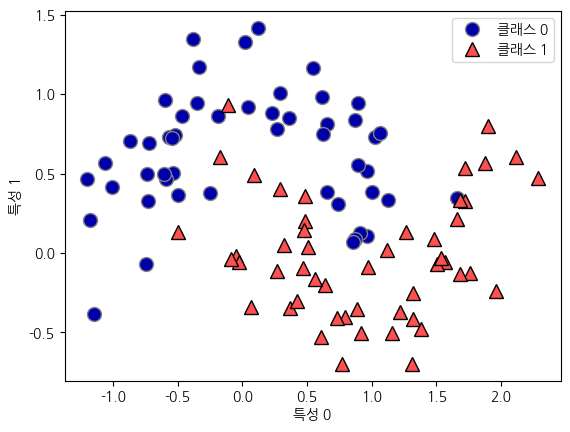

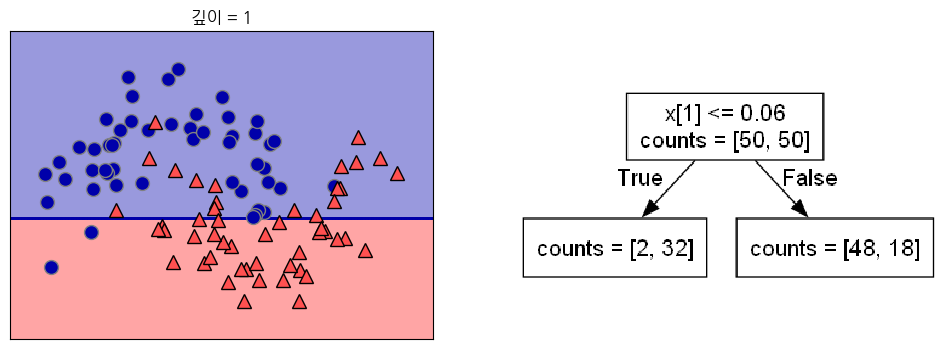

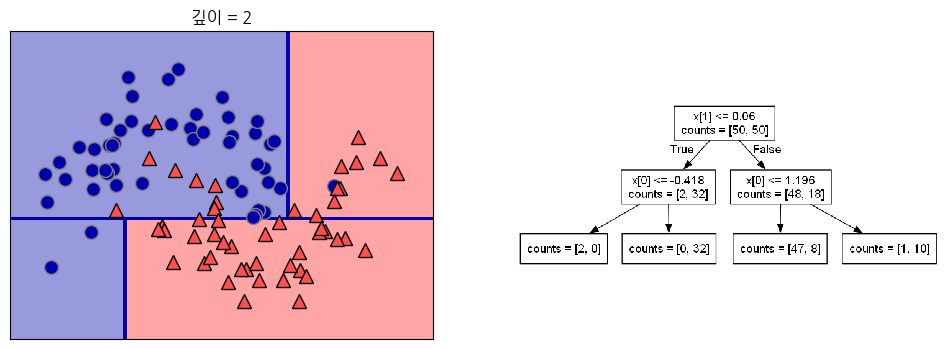

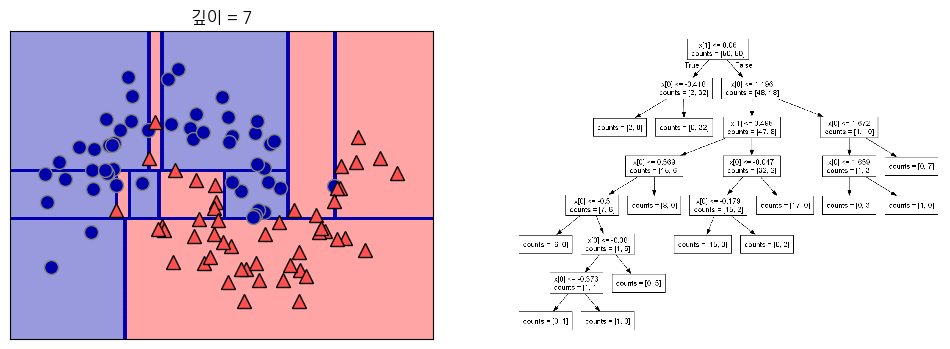

In [88]:
mglearn.plots.plot_tree_progressive()

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree.score(X_train , y_train) #훈련데이터 스코어가 100%이므로 과대적합이다. feature을 30개 다 쓴 것이다.
print(tree.score(X_train , y_train),tree.score(X_test, y_test))


1.0 0.951048951048951


In [90]:
#max_depth=4를 통해 리프노드를 끝까지 가지 않도록 트리의 높이 조절한다
#stratify=cancer.target  암과 암이 아닌것의 비율이 한쪽으로 치우졌을 경우를 대비하기 위해/targer(label)을 넣어야한다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,
                                                     random_state=42)
tree = DecisionTreeClassifier(max_depth=4 ,random_state=42) 
tree.fit(X_train, y_train)
tree.score(X_train , y_train) 
print(tree.score(X_train , y_train),tree.score(X_test, y_test))

0.9882629107981221 0.9440559440559441


In [91]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=["악성","양성"], feature_names=cancer.feature_names
                , impurity=False, filled=True)

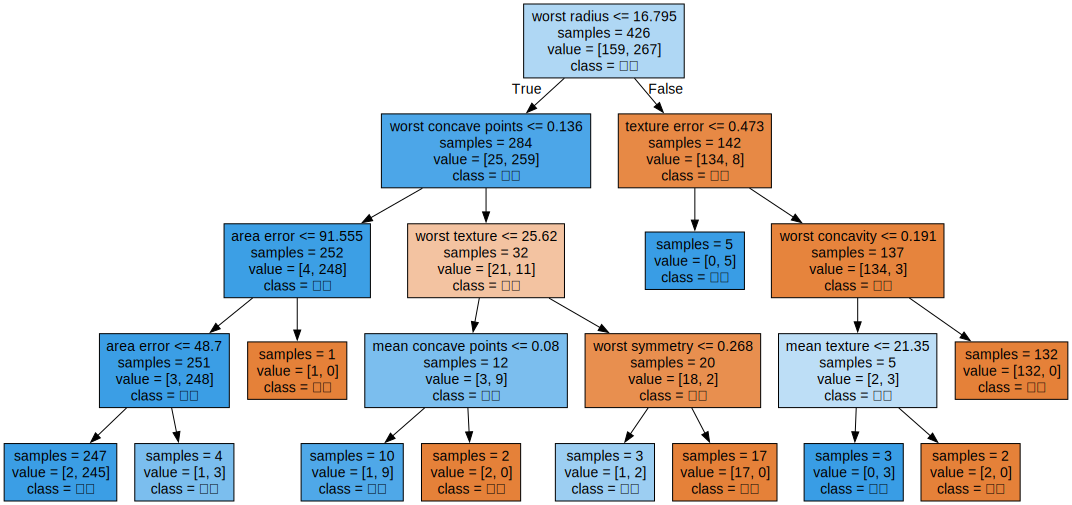

In [92]:
import graphviz
with open("tree.dot", encoding='UTF8') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

## 특성 중요도

In [93]:
tree.feature_importances_

array([0.   , 0.013, 0.   , 0.   , 0.   , 0.   , 0.   , 0.014, 0.   ,
       0.   , 0.   , 0.048, 0.   , 0.013, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.727, 0.033, 0.   , 0.   , 0.   , 0.   , 0.018,
       0.122, 0.012, 0.   ])

In [94]:
def plot_feat_importance(model):
    n_feat=cancer.data.shape[1]
    plt.barh(np.arange(n_feat), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feat), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_feat)


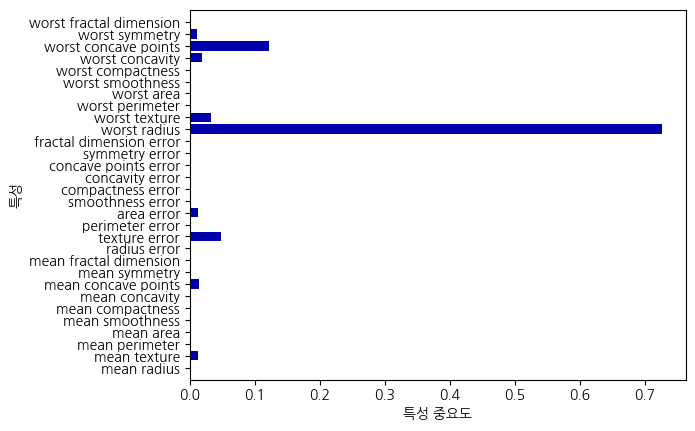

In [95]:
plot_feat_importance(tree)

## 랜덤 포레스트
홀수개로 만들어야 한다. <br />
평균을 넘으면 진한색 , 그렇지 않은 경우 연하다

In [96]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
forest =  RandomForestClassifier(n_estimators=100,random_state=42)    
forest .fit(X_train, y_train)
forest .score(X_train , y_train) #훈련데이터 스코어가 100%이므로 과대적합이다. feature을 30개 다 쓴 것이다.
print(forest .score(X_train , y_train),forest .score(X_test, y_test))

1.0 0.965034965034965


In [97]:
#예측기 1개 선택
#TODO forest 전체값으로 변경
# 추정기 참고자료 https://teddylee777.github.io/visualization/viz-graphviz/
estimator =forest.estimators_[3]
export_graphviz(estimator, out_file='forest.dot', class_names=["악성","양성"], feature_names=cancer.feature_names
                , impurity=False, filled=True)

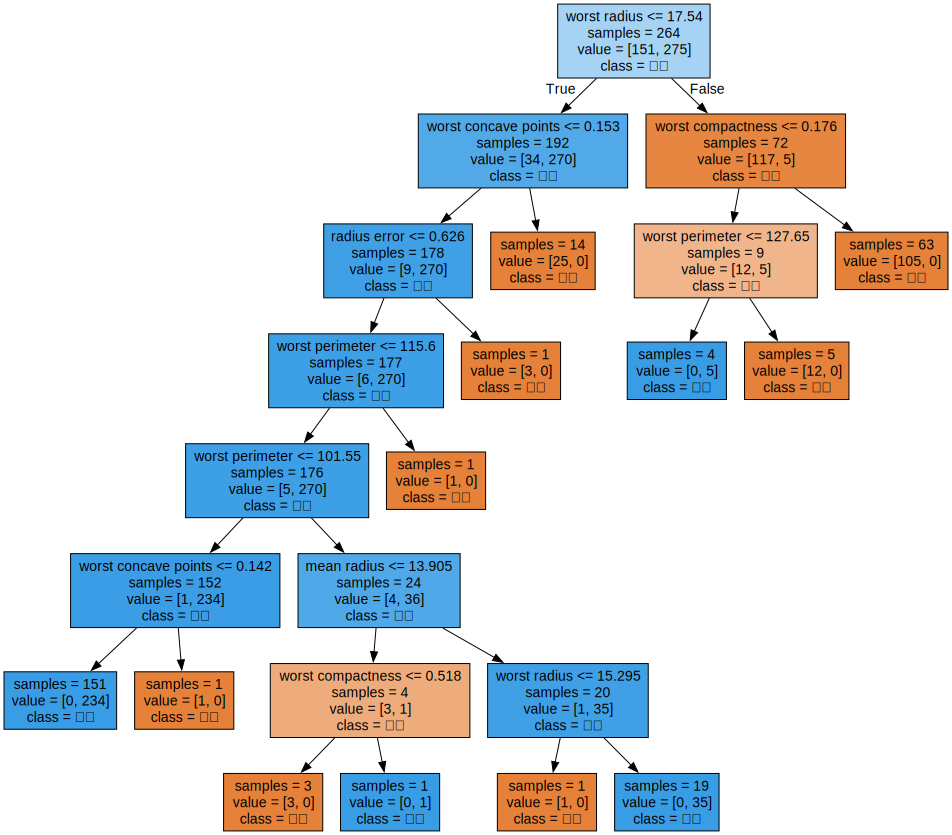

In [98]:
with open("forest.dot", encoding='UTF8') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

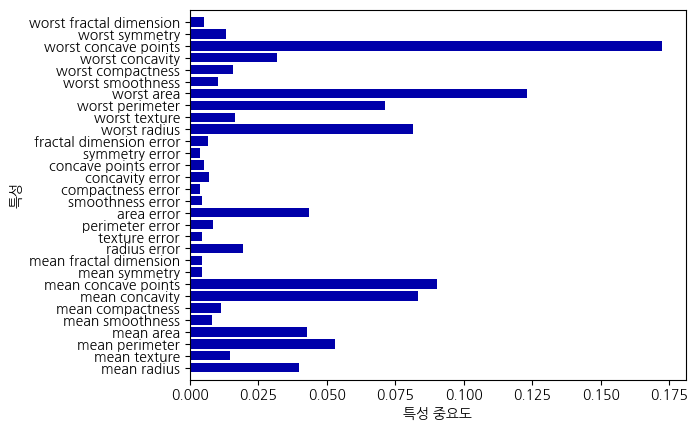

In [99]:
plot_feat_importance(forest)

특성중요도 그래프를 통해 데이터 민감도는 누그러졌음을 알 수 있음 <br />
그러나 여전히 훈련데이터 score이 100퍼센트로 과대적합이다.

결정트리        ----------주요특징 파악     ,               <br />
랜덤포레스트     ---------- 데이터 분류/회귀

## 예제

In [100]:
ram_prices = pd.read_csv("data/ram_price.csv")
ram_prices

,Unnamed: 0,date,price
0,0,1957.00,4.11e+08
1,1,1959.00,6.79e+07
2,2,1960.00,5.24e+06
3,3,1965.00,2.64e+06
4,4,1970.00,7.34e+05
...,...,...,...
328,328,2015.58,4.50e-03
329,329,2015.67,4.30e-03
330,330,2015.75,4.20e-03
331,331,2015.83,3.80e-03


Text(0, 0.5, '가격($/Mbyte)')

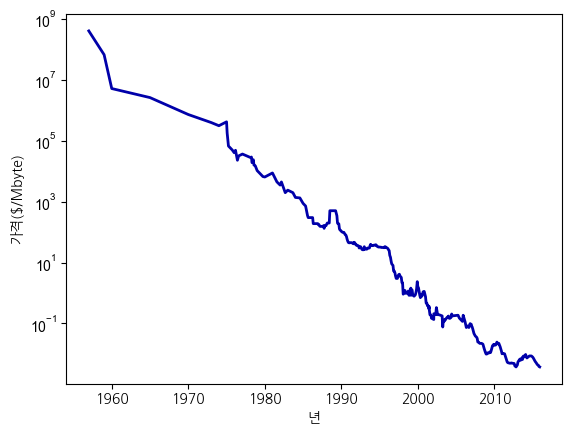

In [101]:
plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date, ram_prices.price)      #로그값으로 변환해진 그래프는 완만해짐
plt.xlabel('년')
plt.ylabel('가격($/Mbyte)')


In [102]:
#2000년 이전을 훈련 데이터로 , 2000년 이후를 테스트 데이터
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

data_train = ram_prices[ram_prices.date <2000]
data_test = ram_prices[ram_prices.date>=2000]

#가격 예측을 위해 날짜 특성만을 이용한다.
X_train=data_train.date.to_numpy()[:,np.newaxis]
y_train=np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
forest = RandomForestRegressor().fit(X_train,y_train)

#예측은 전체 기간에 대해서 수행(시계열 데이터는 대부분 전체기간을 예측데이터로 쓴다.)
X_all=ram_prices.date.to_numpy()[:,np.newaxis]  

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
pred_forest = forest.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)
price_forest = np.exp(pred_forest)



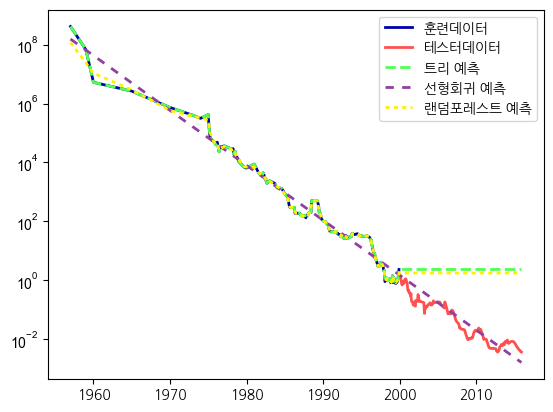

In [103]:
plt.yticks(fontname='Arial')
plt.semilogy(data_train.date, data_train.price, label ="훈련데이터")
plt.semilogy(data_test.date, data_test.price, label ="테스터데이터")
plt.semilogy(ram_prices.date, price_tree, label ="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label ="선형회귀 예측")
plt.semilogy(ram_prices.date, price_forest, label ="랜덤포레스트 예측")
plt.legend()

시계열 데이터로 랜덤포레스트 하면 안 된다.
랜덤포레스트는 처음보는 데이터에 민감하다 <br />
트리나 랜덤포레스트는 훈련데이터가 없어 현재시점에 대해 예측을 못하지만 현재까지 다 포함해서 예측데이터 독립변수로 넣어야함

머신러닝-데이터 다다익선, 경향성을 따라가는 것을 목적 <br />
딥러닝 - 확률적 경사하강, 오차를 줄이는 것이 목적


선형회귀는 단순하지만 예측률이 높은 편이다.